In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [3]:
file_path = '/content/MathE dataset (4).csv'
dataset = pd.read_csv(file_path, delimiter=';', encoding='ISO-8859-1')



 use delimiter=';' because of this csv file include ; instead of ,


 use encoding='ISO-8859-1' because of this csv file include some characters couldn't be interpreted correctly in UTF-8 format


# Data visualisation

# Visualize the distribution of students by country

### Using a map visualization technique

In [4]:
import plotly.express as px

country_counts = dataset['Student Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

# Create a choropleth map
fig = px.choropleth(country_counts,
                    locations="Country",
                    locationmode='country names',
                    color="Count",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Student Distribution by Country")


fig.show()


this use when dealing with geographical data or location-based analysis

### Using chart visualization technique

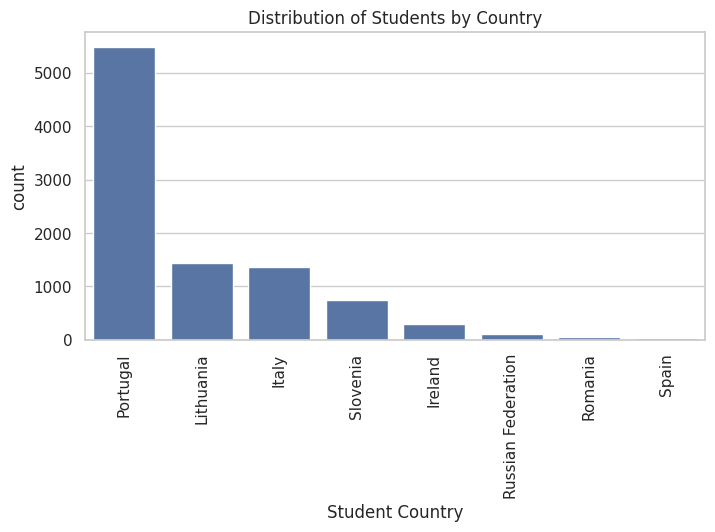

In [6]:
plt.figure(figsize=(8, 4))
sns.countplot(data=dataset, x='Student Country', order=dataset['Student Country'].value_counts().index)
plt.title('Distribution of Students by Country')
plt.xticks(rotation=90)
plt.show()


# Visualize the distribution of correct (1) vs incorrect (0) answers(bar plot)

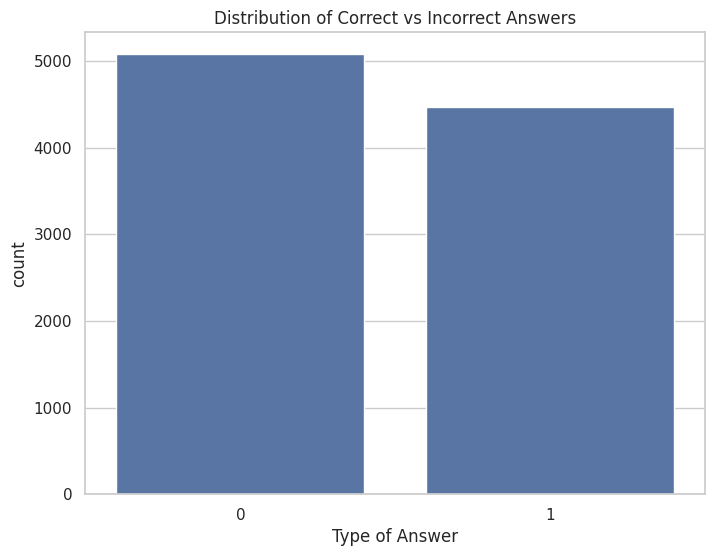

In [29]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='Type of Answer')
plt.title('Distribution of Correct vs Incorrect Answers')
plt.show()


# Visualize the Performance comparison across Basic and Advanced levels

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


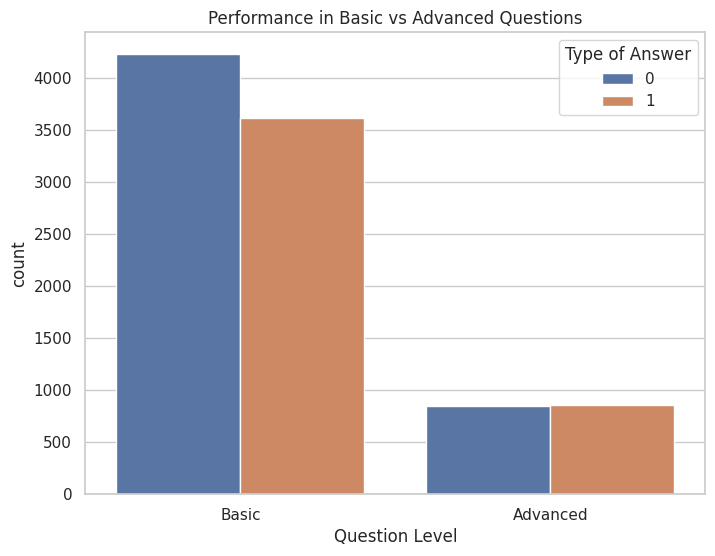

In [5]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='Question Level', hue='Type of Answer')
plt.title('Performance in Basic vs Advanced Questions')
plt.show()


# Distribution Analysis

# Distribution of Question IDs

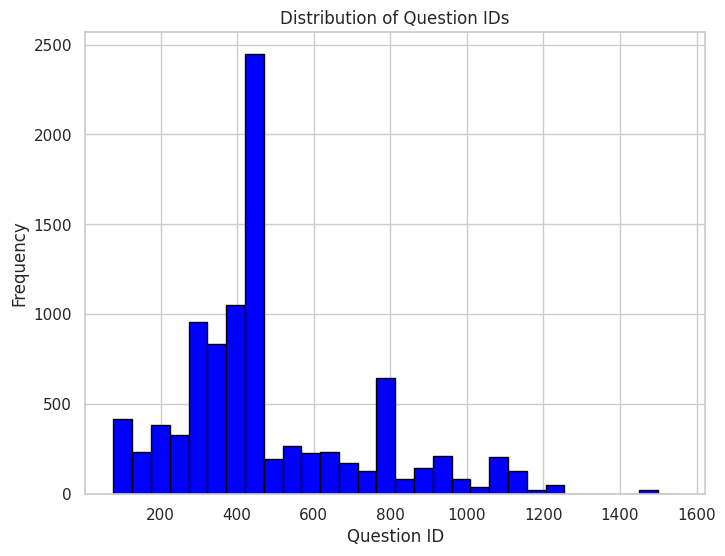

In [42]:
plt.figure(figsize=(8, 6))
plt.hist(dataset['Question ID'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Question IDs')
plt.xlabel('Question ID')
plt.ylabel('Frequency')
plt.show()


# Distribution of Question IDs by Question Level

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



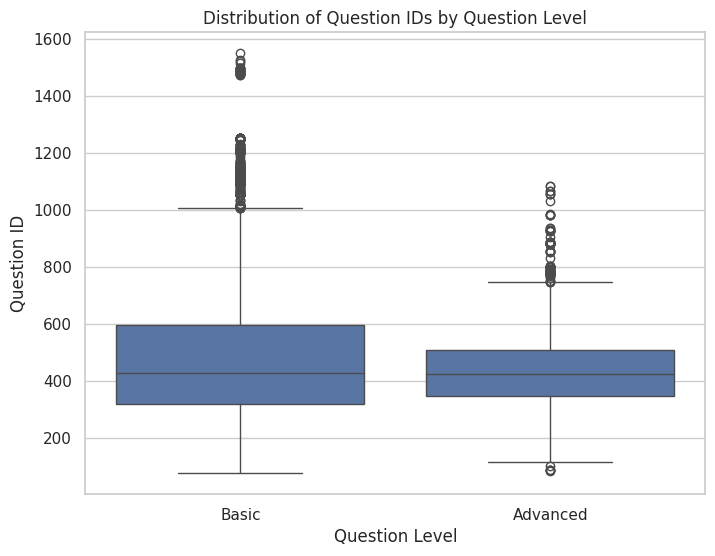

In [43]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=dataset, x='Question Level', y='Question ID')
plt.title('Distribution of Question IDs by Question Level')
plt.show()


# Distribution of questions across topics

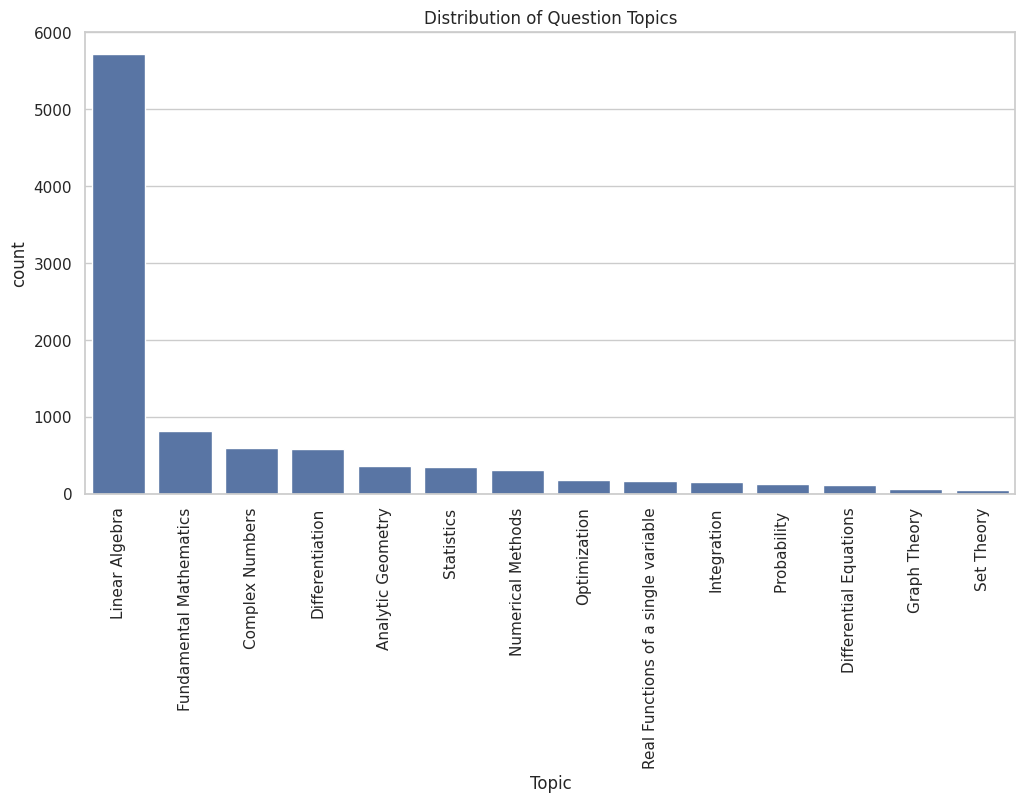

In [7]:
plt.figure(figsize=(12, 6))
sns.countplot(data=dataset, x='Topic', order=dataset['Topic'].value_counts().index)
plt.title('Distribution of Question Topics')
plt.xticks(rotation=90)
plt.show()


# Distribution of questions across subtopics

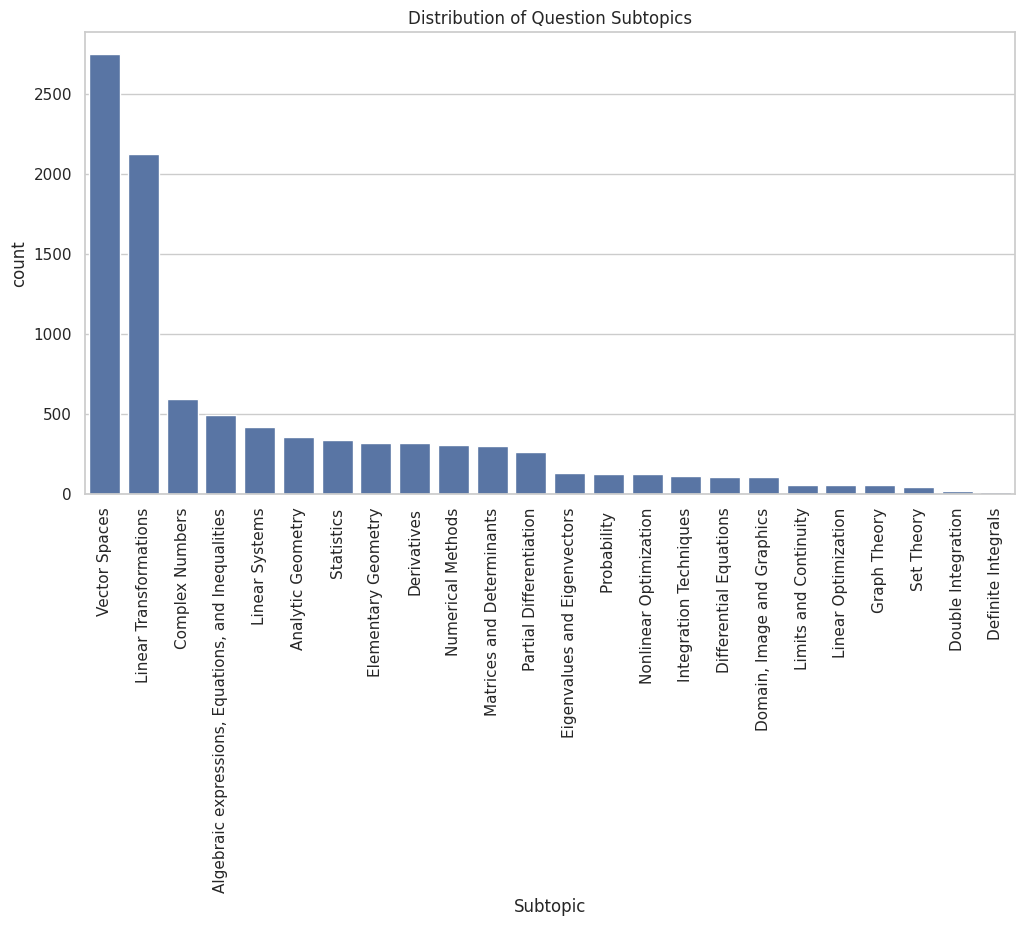

In [8]:
plt.figure(figsize=(12, 6))
sns.countplot(data=dataset, x='Subtopic', order=dataset['Subtopic'].value_counts().index)
plt.title('Distribution of Question Subtopics')
plt.xticks(rotation=90)
plt.show()


# Correlation Analysis

# Correlation Heatmap for Numerical Fields

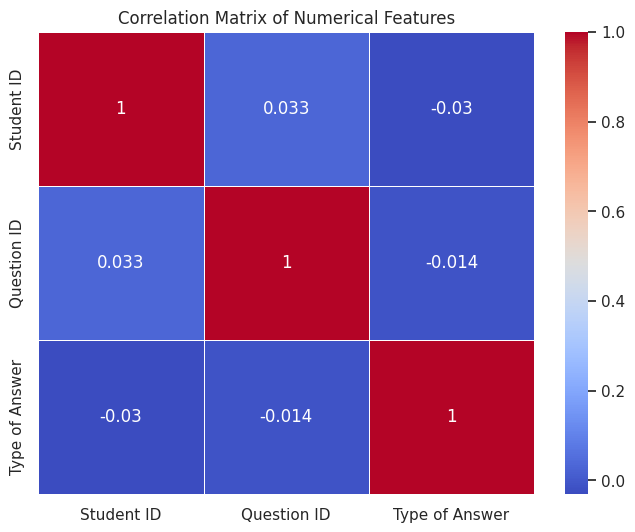

In [10]:
# Select only numeric columns
numeric_data = dataset.select_dtypes(include=['number'])

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


# Correlation between Question Level and Answer Type(cross tab)

Type of Answer     0     1
Question Level            
Advanced         849   853
Basic           4227  3617


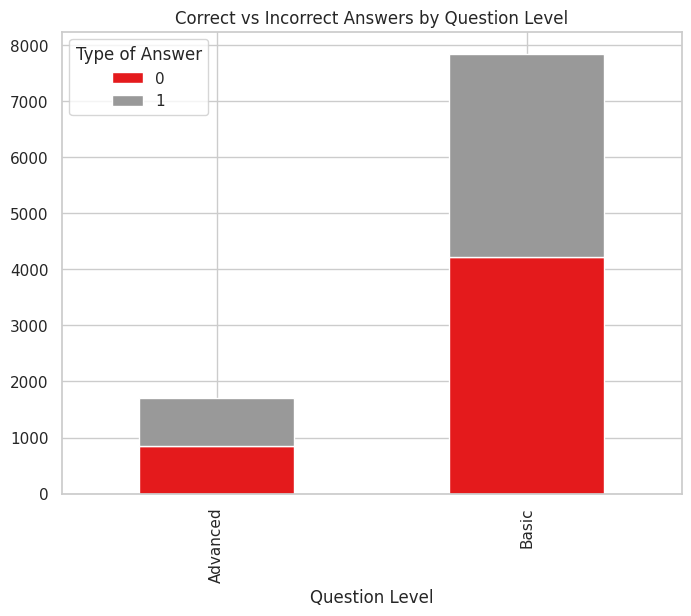

In [11]:
cross_tab = pd.crosstab(dataset['Question Level'], dataset['Type of Answer'])
print(cross_tab)

cross_tab.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='Set1')
plt.title('Correct vs Incorrect Answers by Question Level')
plt.show()


# Correlation between Student Country and Answer Type(cross tab)

Type of Answer         0     1
Student Country               
Ireland              162   138
Italy                752   606
Lithuania            814   629
Portugal            3001  2494
Romania               25    35
Russian Federation    70    37
Slovenia             236   519
Spain                 16    12


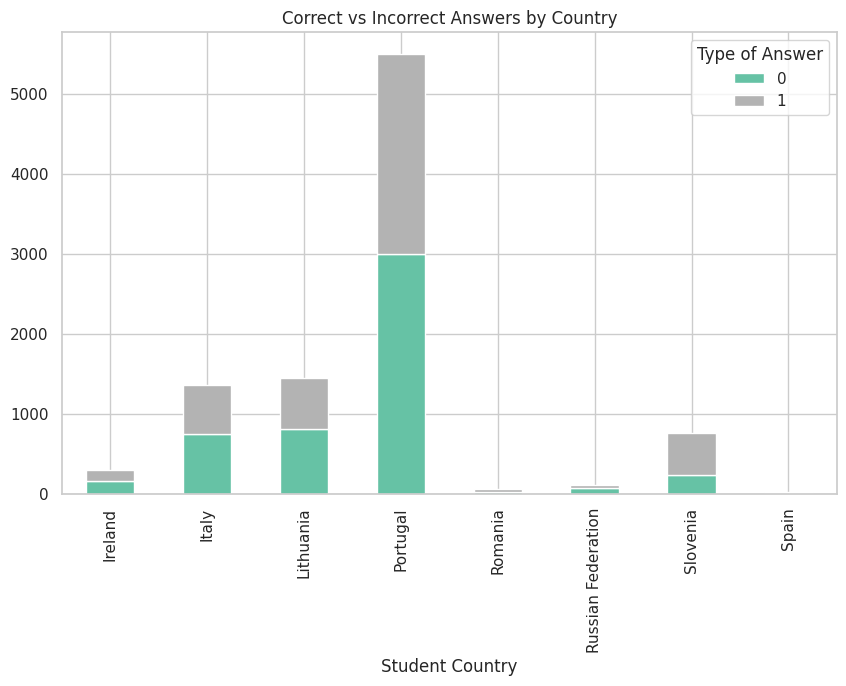

In [12]:
country_performance = pd.crosstab(dataset['Student Country'], dataset['Type of Answer'])
print(country_performance)

country_performance.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title('Correct vs Incorrect Answers by Country')
plt.xticks(rotation=90)
plt.show()


# Descriptive statistics of the dataset

In [35]:
print(dataset.describe(include='all'))


         Student ID Student Country  Question ID  Type of Answer  \
count   9546.000000            9546  9546.000000     9546.000000   
unique          NaN               8          NaN             NaN   
top             NaN        Portugal          NaN             NaN   
freq            NaN            5495          NaN             NaN   
mean     775.402263             NaN   478.912319        0.468259   
std      460.590559             NaN   249.244061        0.499018   
min       26.000000             NaN    77.000000        0.000000   
25%      380.000000             NaN   323.000000        0.000000   
50%      885.000000             NaN   428.000000        0.000000   
75%     1219.000000             NaN   571.000000        1.000000   
max     1565.000000             NaN  1549.000000        1.000000   

       Question Level           Topic       Subtopic  \
count            9546            9546           9546   
unique              2              14             24   
top            